## Nepal Earthquake.

Vamos a tratar de predecir la variable ordinal "damage_grade", que representa el nivel de daño a un edificio que fue golpeado por un terremoto. Hay 3 grados de daño:

1. representa un daño bajo
2. representa una cantidad moderada de daño
3. representa una destrucción casi completa.

## Descripción de las variables.



*   geo_level_1_id, geo_level_2_id, geo_level_3_id (tipo: int): región geográfica en la que se encuentra el edificio, desde la más grande (nivel 1) hasta la subregión más  
    específica (nivel 3). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.
*   count_floors_pre_eq (tipo: int): número de pisos del edificio antes del terremoto.
*   age (tipo: int): edad del edificio en años.
*   area_percentage (tipo: int): área normalizada de la huella del edificio.
*   height_percentage (tipo: int): altura normalizada de la huella del edificio.
*   land_surface_condition (tipo: categórico): condición de la superficie del suelo donde se construyó el edificio. Valores posibles: n, o, t.
*   foundation_type (tipo: categórico): tipo de cimentación utilizada durante la construcción. Valores posibles: h, i, r, u, w.
*   roof_type (tipo: categórico): tipo de techo utilizado durante la construcción. Valores posibles: n, q, x.
*   ground_floor_type (tipo: categórico): tipo de piso de planta baja. Valores posibles: f, m, v, x, z.
*   other_floor_type (tipo: categórico): tipo de construcciones utilizadas en pisos superiores al de la planta baja (excepto el techo). Valores posibles: j, q, s, x.
*   position (tipo: categórico): posición del edificio. Valores posibles: j, o, s, t.
*   plan_configuration (tipo: categórico): configuración del plan de construcción. Valores posibles: a, c, d, f, m, n, o, q, s, u.
*   has_superstructure_adobe_mud (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Adobe/Barro.
*   has_superstructure_mud_mortar_stone (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Barro - Piedra.
*   has_superstructure_stone_flag (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Piedra.
*   has_superstructure_cement_mortar_stone (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Cemento - Piedra.
*   has_superstructure_mud_mortar_brick (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Barro - Ladrillo.
*   has_superstructure_cement_mortar_brick (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Cemento - Ladrillo.
*   has_superstructure_timber (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Madera.
*   has_superstructure_bamboo (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Bambú.
*   has_superstructure_rc_non_engineered (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de concreto armado no estructurado.
*   has_superstructure_rc_engineered (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de concreto armado no estructurado.
*   has_superstructure_other (tipo: binario): variable de bandera que indica si la superestructura estaba hecha de algún otro material.
*   legal_ownership_status (tipo: categórico): estado legal de propiedad del terreno donde se construyó el edificio. Posibles valores: a, r, v, w.
*   count_families (tipo: entero): número de familias que viven en el edificio.
*   has_secondary_use (tipo: binario): variable de bandera que indica si el edificio se usó para algún propósito secundario.
*   has_secondary_use_agriculture (tipo: binario): variable de bandera que indica si el edificio se usó para fines agrícolas.
*   has_secondary_use_hotel (tipo: binario): variable de bandera que indica si el edificio se usó como hotel.
*   has_secondary_use_rental (tipo: binario): variable de bandera que indica si el edificio se usó para fines de alquiler.
*   has_secondary_use_institution (tipo: binario): variable de bandera que indica si el edificio se usó como una ubicación de alguna institución.
*   has_secondary_use_school (tipo: binario): variable de bandera que indica si el edificio se usó como escuela.
*   has_secondary_use_industry (tipo: binario): variable de bandera que indica si el edificio se usó para fines industriales.
*   has_secondary_use_health_post (tipo: binario): variable de bandera que indica si el edificio se usó como puesto de salud.
*   has_secondary_use_gov_office (tipo: binario): variable de bandera que indica si el edificio se usó como oficina gubernamental.
*   has_secondary_use_use_police (tipo: binario): variable de bandera que indica si el edificio se usó como estación de policía.
*   has_secondary_use_other (tipo: binario): variable de bandera que indica si el edificio se usó secundariamente para otros propósitos.

## Carga de datos

Cargamos los datos de mi github.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler
from keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np


url = 'https://raw.githubusercontent.com/alexander6779/SNS/main/TerremotoNepal/Data/'

x_train = pd.read_csv(url+'train_values.csv',sep=',')
y_train = pd.read_csv(url+'train_labels.csv',sep=',')
X_test =  pd.read_csv(url+'test_values.csv',sep=',')
x_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


## Transformacion de datos

Vamos a transformar todos los datos que sean categóricos a numéricos, además de revisar que todos los datos sean reales.

In [9]:
land_surface_condition = {'n':0,'o':1,'t':2}
foundation_type = {'h':0,'i':1,'r':2,'u':3,'w':4}
roof_type = {'n':0,'q':1,'x':2}
ground_floor_type = {'f':0,'m':1,'v':2,'x':3,'z':4}
other_floor_type = {'j':0,'q':1,'s':2,'x':3}
position = {'j':0,'o':1,'s':2,'t':3}
plan_configuration = {'a':0,'c':1,'d':2,'f':3,'m':4,'n':5,'o':6,'q':7,'s':8,'u':9}
legal_ownership_status = {'a':0,'r':1,'v':2,'w':3}      

In [10]:
def fromCatToNum(datafram):
  datafram['land_surface_condition'] = datafram['land_surface_condition'].map(land_surface_condition)
  datafram['foundation_type'] = datafram['foundation_type'].map(foundation_type)
  datafram['roof_type'] = datafram['roof_type'].map(roof_type)
  datafram['ground_floor_type'] = datafram['ground_floor_type'].map(ground_floor_type)
  datafram['other_floor_type'] = datafram['other_floor_type'].map(other_floor_type)
  datafram['position'] = datafram['position'].map(position)
  datafram['plan_configuration'] = datafram['plan_configuration'].map(plan_configuration)
  datafram['legal_ownership_status'] = datafram['legal_ownership_status'].map(legal_ownership_status)

In [11]:
fromCatToNum(x_train)
fromCatToNum(X_test)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int64
 9   foundation_type                         260601 non-null  int64
 10  roof_type                               260601 non-null  int64
 11  

## Escalar datos

Escalo los datos de los datos de x_train y X_test para que nuestro modelo pueda entrenar de manera más fácil.Para ello, hago uso del MaxAbsScaler, que emplea valores absolutos dentro de su algoritmo, clasificando así los datos por rangos entre 0 y 1. 

In [13]:
scaler =MaxAbsScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)
x_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0.762542,0.200000,0.341275,0.970637,0.222222,0.030151,0.06,0.15625,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027381,0.266667,0.630694,0.223761,0.222222,0.010050,0.08,0.21875,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.090174,0.700000,0.254380,0.714013,0.222222,0.010050,0.05,0.15625,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.561177,0.733333,0.292922,0.850959,0.222222,0.010050,0.06,0.15625,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.191792,0.366667,0.091801,0.118405,0.333333,0.030151,0.08,0.28125,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.654016,0.833333,0.935529,0.128989,0.111111,0.055276,0.06,0.09375,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260597,0.635828,0.566667,0.501051,0.163921,0.222222,0.000000,0.06,0.15625,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260598,0.572222,0.566667,0.035739,0.649558,0.333333,0.055276,0.06,0.21875,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260599,0.143797,0.866667,0.027330,0.147291,0.222222,0.010050,0.14,0.18750,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELO NEURONAL

1. Primero separo los datos entre X_train,Y_train,x_val = X_test e y_val = Y_test,llamo así a estos últimos para no confundir variables.
2. Segundo Construyo un modelo neuronal fully connected, dónde indico el tamaño inicial de los datos a tratar, es decir, las columnas.Además, añado un par de capas neuronales junto con una capa de Dropout (capa que te ayuda a no sobre ajustar el modelo), y finalmente la salida que van a ser los 3 resultados qe va a averigurar para resolver el problema, el daño recibido (1,2 y 3).
3. Indico el compilador del modelo, con los parámetros a usar, en éste caso, el optimizador 'Adam' para los problemas de clasificicación, con un apredizaje de 0.001%.
El parámetro de pérdida es el categorical_crossentropy, usa la entropía en su algoritmo y la métrica a averiguar que es accuracy.
4. Finalmente entrenamos.Importante, en usando estos parámetros nuestra y hay que convertir los valores categóricos 1,2 y 3 a numéricos entre 0 y 1, algo parecido al one-hot-encoding.



In [14]:
# creación del modelo fully connected

X_train,x_val,Y_train,y_val = train_test_split(x_train , y_train['damage_grade'], test_size=0.3, random_state=42)

model = models.Sequential() 
model.add(layers.Flatten(input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [15]:
#compoilador
model.compile(optimizer = optimizers.Adam(lr=0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

c:\Users\alexa\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# entrenaimento del modelo
train_log = model.fit(X_train,  pd.get_dummies(Y_train), 
                      epochs=40, batch_size=70,)

Epoch 1/40
2606/2606 [==============================] - 8s 3ms/step - loss: 0.7875 - accuracy: 0.6042
Epoch 2/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7451 - accuracy: 0.6364
Epoch 3/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7299 - accuracy: 0.6480
Epoch 4/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7223 - accuracy: 0.6537
Epoch 5/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7157 - accuracy: 0.6587
Epoch 6/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7107 - accuracy: 0.6619
Epoch 7/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7055 - accuracy: 0.6646
Epoch 8/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.7017 - accuracy: 0.6675
Epoch 9/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.6978 - accuracy: 0.6694
Epoch 10/40
2606/2606 [==============================] - 7s 3ms/step - loss: 0.694

## Predecimos con los datos de X_test

In [17]:
# análisis de resultados
prediccion = model.predict(X_test)

2715/2715 [==============================] - 4s 1ms/step


In [18]:
prediccion

array([[1.85037003e-04, 1.69440910e-01, 8.30374062e-01],
       [2.30975356e-02, 7.59789109e-01, 2.17113405e-01],
       [2.13675443e-02, 4.79745626e-01, 4.98886794e-01],
       ...,
       [1.16808675e-01, 7.22737014e-01, 1.60454318e-01],
       [9.21726041e-03, 7.53525555e-01, 2.37257242e-01],
       [3.66365373e-01, 5.73701084e-01, 5.99335507e-02]], dtype=float32)

## Obtención de resultados 

Después de realizar la predicción, dicha variable no va a obtener los resultados directamente sino que te devolverá un array o lista que tiene 3 valores por fila, lo que significa que el valor más grande es el más adecuado/preciso, y se obtiene de la siguiente manera:

In [19]:
# Hago uso del np.argmax() que me devuelve el índice del valor mayor de la fila 
# y le sumo 1 para que esté entre los valores finales, por tanto si me devuelve 0 va a corresponder a 1,...

resultados = []

for i in range(len(prediccion)):
    resultados.append(np.argmax(prediccion[i])+1)

In [20]:
resultados

[3,
 2,
 3,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


## Calculo precisión y f1_score del modelo

In [21]:
loss, accuracy = model.evaluate(X_test[0:len(y_val)], pd.get_dummies(y_val))
print('Test loss:', loss)
print('Test accuracy:', accuracy)

2444/2444 [==============================] - 4s 2ms/step - loss: 1.3556 - accuracy: 0.4843
Test loss: 1.3555783033370972
Test accuracy: 0.4842608869075775


Tener en cuenta que éste no es el verdadero, ya que no lo comparo con los valores reales sino con los de entrenamiento,
además de no tener el mismo tamaño, por tanto es una simulación.

In [23]:
# Calcular el F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_val, resultados[0:len(y_val)], average='micro',labels=[1,2,3])
print("El F1-score del modelo es:", f1)

El F1-score del modelo es: 0.4842608817999258


## Matriz de confusión

Text(0.5, 1.0, 'Exactitud: 0.4772898852825165')

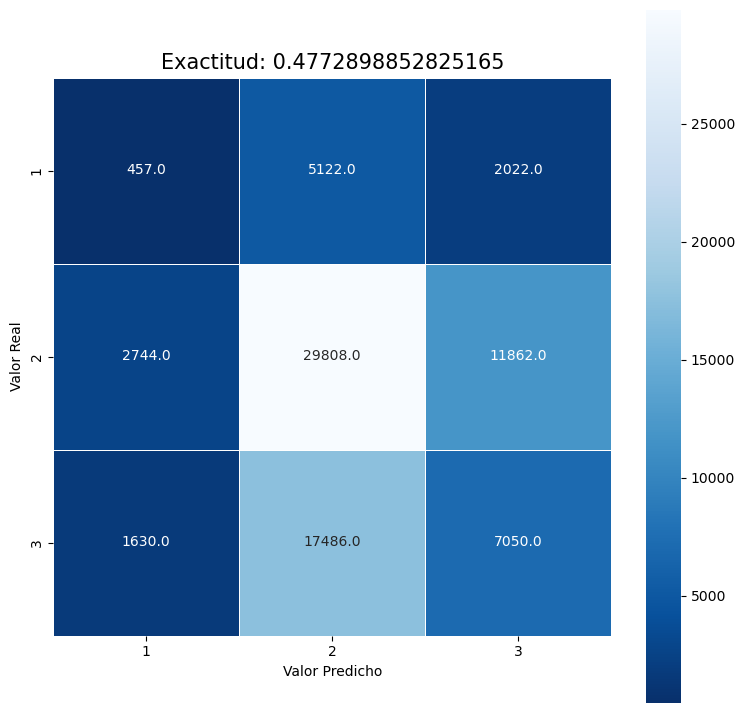

In [ ]:
cm = confusion_matrix(y_val, resultados[0:len(y_val)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(f1)
plt.title(all_sample_title, size = 15)

## Guardo los datos en el fichero que me proporciona la competición, subirlo y ver cuánto de acierto tiene el modelo.

In [ ]:
submission =  pd.read_csv(url+'submission_format.csv',sep=',')
submission['damage_grade'] = resultados
submission.to_csv('red.csv', index=False)  

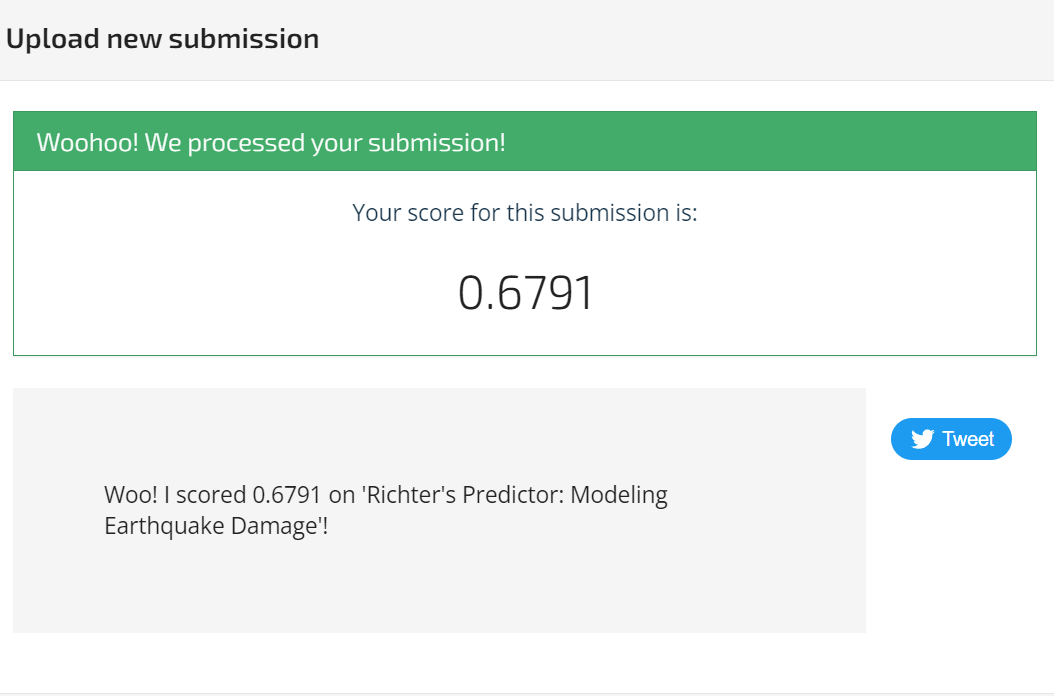

Ese ha sido el porcentaje de acierto usando el criterio f1_score por la competición